In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from linearmodels.panel import PanelOLS

In [2]:
cd/Users/yeji-park/Downloads/Time_Series_Analysis_CO2/Datasets

/Users/yeji-park/Downloads/Time_Series_Analysis_CO2/Datasets


In [3]:
time = 1990

GDP per Capita

In [4]:
# in current us($)
gdp = pd.read_csv('gdp_per_capita.csv', skiprows=3)
gdp.drop(labels = ["Country Code", "Indicator Code"], axis = 1, inplace = True)
gdp.rename(columns = {'Country Name':"Country", "Indicator Name":'Indicator'}, inplace = True)

# Filter out the 'Unnamed: 67' column
gdp = gdp.loc[:, ~gdp.columns.str.startswith('Unnamed')]

# Melt the DataFrame to reshape it
gdp = gdp.melt(id_vars=['Country', 'Indicator'], var_name='Year', value_name='GDP')

# Filter out rows where Indicator is not 'GDP per capita (current US$)'
gdp = gdp[gdp['Indicator'] == 'GDP per capita (current US$)']

# Drop the 'Indicator' column
gdp.drop(columns=['Indicator'], inplace=True)

# Reset the index
gdp.reset_index(drop=True, inplace=True)

# Convert 'Year' column to integer type
gdp['Year'] = gdp['Year'].astype(int)

# Drop rows with NaN values in the 'GDP' column
gdp.dropna(subset=['GDP'], inplace=True)

# Reset the index
gdp.reset_index(drop=True, inplace=True)

gdp = gdp[gdp['Year'] > time]

,Country,Year,GDP
5203,Aruba,1991,12850.215712
5204,Africa Eastern and Southern,1991,865.255505
5205,Africa Western and Central,1991,602.994289
5206,Angola,1991,850.556180
5207,Albania,1991,336.586995
...,...,...,...
13199,Kosovo,2022,5340.268798
13200,"Yemen, Rep.",2022,650.272218
13201,South Africa,2022,6766.481254
13202,Zambia,2022,1456.901570


CO2 Emissions by Sectors

In [5]:
co2_sector = pd.read_csv('co-emissions-by-sector.csv')
co2_sector.rename(columns = {'Entity':"Country", "Carbon dioxide emissions from buildings":"Buildings",
                      "Carbon dioxide emissions from industry":"Industry",
                      "Carbon dioxide emissions from land use change and forestry":"Land use change and Forestry",
                      "Carbon dioxide emissions from other fuel combustion": "Other Fuel Combustion",
                      "Carbon dioxide emissions from transport":"Transport",
                      "Carbon dioxide emissions from manufacturing and construction":"Manufacturing and Construction",
                      "Fugitive emissions of carbon dioxide from energy production":"Energy Production",
                      "Carbon dioxide emissions from electricity and heat": "Electricity and Heat"}, inplace = True)
co2_sector.drop(labels = ["Code"], axis = 1, inplace = True)

co2_sector = co2_sector[co2_sector['Year'] > time]

,Country,Year,Buildings,Industry,Land use change and Forestry,Other Fuel Combustion,Transport,Manufacturing and Construction,Energy Production,Electricity and Heat
1,Afghanistan,1991,140000.0,50000.0,-2390000.0,0.0,930000.0,530000.0,NaN,300000.0
2,Afghanistan,1992,150000.0,50000.0,-2390000.0,0.0,740000.0,390000.0,NaN,200000.0
3,Afghanistan,1993,160000.0,50000.0,-2390000.0,0.0,740000.0,380000.0,NaN,200000.0
4,Afghanistan,1994,160000.0,50000.0,-2390000.0,0.0,730000.0,360000.0,NaN,190000.0
5,Afghanistan,1995,160000.0,50000.0,-2390000.0,0.0,730000.0,340000.0,NaN,180000.0
...,...,...,...,...,...,...,...,...,...,...
6350,Zimbabwe,2016,220000.0,460000.0,87160000.0,660000.0,2150000.0,1060000.0,NaN,5900000.0
6351,Zimbabwe,2017,220000.0,470000.0,87160000.0,660000.0,2210000.0,1090000.0,NaN,5130000.0
6352,Zimbabwe,2018,240000.0,560000.0,87160000.0,790000.0,2840000.0,1140000.0,NaN,5500000.0
6353,Zimbabwe,2019,240000.0,470000.0,87160000.0,780000.0,2510000.0,1080000.0,NaN,5100000.0


Corporate Investment

In [6]:
corp_investment = pd.read_csv("corporate_investment.csv")
corp_investment.drop(labels = ["INDICATOR","SUBJECT","MEASURE","Flag Codes","FREQUENCY"], axis = 1, inplace = True)
country_mapping = {"IRL": "Ireland", "CHL": "Chile", "CAN": "Canada", "PRT": "Portugal", "POL": "Poland", "AUS": "Australia", "FRA": "France", "CHE": "Switzerland", "NLD": "Netherlands", "RUS": "Russia", "HUN": "Hungary", "ITA": "Italy", "ZAF": "South Africa", "CZE": "Czech Republic", "FIN": "Finland", "MEX": "Mexico", "SWE": "Sweden", "GRC": "Greece", "DNK": "Denmark", "KOR": "South Korea", "NZL": "New Zealand", "GBR": "United Kingdom", "CHN": "China", "ESP": "Spain", "LUX": "Luxembourg", "BEL": "Belgium", "JPN": "Japan", "SVN": "Slovenia", "USA": "United States", "SVK": "Slovakia", "NOR": "Norway", "DEU": "Germany", "AUT": "Austria", "EST": "Estonia", "EA": "European Union (EU)", "EU": "European Union (EU)", "BRA": "Brazil", "LVA": "Latvia", "TUR": "Turkey", "COL": "Colombia", "LTU": "Lithuania"}
corp_investment['LOCATION'] = corp_investment['LOCATION'].replace(country_mapping)
corp_investment.rename(columns = {'LOCATION':"Country",'TIME':'Year', "Value":"Investment"}, inplace = True)


corp_investment = corp_investment[corp_investment['Year'] > time]

,Country,Year,Investment
0,Ireland,1995,51.096060
1,Ireland,1996,50.778350
2,Ireland,1997,51.098795
3,Ireland,1998,51.794322
4,Ireland,1999,50.840146
...,...,...,...
1218,Lithuania,2018,64.845054
1219,Lithuania,2019,64.668039
1220,Lithuania,2020,56.930683
1221,Lithuania,2021,64.087079


Industrial Production

In [7]:
industrial_production = pd.read_csv("industrial production.csv")
industrial_production.drop(labels = ["INDICATOR","SUBJECT","MEASURE","Flag Codes","FREQUENCY"], axis = 1, inplace = True)
country_mapping = {
    "IRL": "Ireland", "CHL": "Chile", "CAN": "Canada", "PRT": "Portugal", "POL": "Poland",
    "AUS": "Australia", "FRA": "France", "CHE": "Switzerland", "NLD": "Netherlands", "RUS": "Russia",
    "HUN": "Hungary", "ITA": "Italy", "ZAF": "South Africa", "CZE": "Czech Republic", "FIN": "Finland",
    "MEX": "Mexico", "SWE": "Sweden", "GRC": "Greece", "DNK": "Denmark", "KOR": "South Korea",
    "NZL": "New Zealand", "GBR": "United Kingdom", "CHN": "China", "ESP": "Spain", "LUX": "Luxembourg",
    "BEL": "Belgium", "JPN": "Japan", "SVN": "Slovenia", "USA": "United States", "SVK": "Slovakia",
    "NOR": "Norway", "DEU": "Germany", "AUT": "Austria", "EST": "Estonia", "EA": "European Union (EU)",
    "EU": "European Union (EU)", "BRA": "Brazil", "LVA": "Latvia", "TUR": "Turkey", "COL": "Colombia",
    "LTU": "Lithuania", "IND": "India", "ISR": "Israel", "BGR": "Bulgaria", "HRV": "Croatia", "ROU": "Romania"
}
industrial_production['LOCATION'] = industrial_production['LOCATION'].replace(country_mapping)
industrial_production.rename(columns = {'LOCATION':"Country", "Value":'Industrial Production','TIME':'Year'}, inplace = True)
industrial_production.drop(industrial_production[industrial_production['Country'].isin(["OECD", "OECDE", "G-7", "EU27_2020"])].index, inplace=True)

industrial_production = industrial_production[industrial_production['Year'] > time]

,Country,Year,Industrial Production
16,Australia,1991,51.09973
17,Australia,1992,51.43092
18,Australia,1993,52.81977
19,Australia,1994,55.45277
20,Australia,1995,57.30751
...,...,...,...
2240,Romania,2018,117.52250
2241,Romania,2019,113.31080
2242,Romania,2020,102.57970
2243,Romania,2021,110.14590


Primary Energy Consumption

In [8]:
primary_energy_consumption = pd.read_csv("primary-energy-cons.csv")
primary_energy_consumption.rename(columns = {'Entity':"Country", "Primary energy consumption (TWh)":"Energy Consumption"}, inplace = True)
primary_energy_consumption.drop(labels = ["Code"], axis = 1, inplace = True)
primary_energy_consumption = primary_energy_consumption[primary_energy_consumption['Year'] > time]

,Country,Year,Energy Consumption
11,Afghanistan,1991,13.902764
12,Afghanistan,1992,9.167781
13,Afghanistan,1993,9.105348
14,Afghanistan,1994,8.815903
15,Afghanistan,1995,7.428904
...,...,...,...
12072,Zimbabwe,2017,45.256546
12073,Zimbabwe,2018,51.809430
12074,Zimbabwe,2019,46.119940
12075,Zimbabwe,2020,41.996760


# Policy 1 

# Data pre-processing

In [47]:
countries_no_tax = ["United States", "China", "India", "Russia", "Brazil", "Germany", "South Korea", "Canada", "Australia", "Saudi Arabia", "Iran", "Indonesia", "South Africa", "Turkey", "Mexico", "Thailand", "Vietnam", "Malaysia", "Egypt", "United Arab Emirates"]


# Countries without Policy 1 CO2 per Capita
per_capita = pd.read_csv("co-emissions-per-capita.csv")
per_capita.rename(columns = {'Annual CO₂ emissions (per capita)':"CO2_per_capita"}, inplace = True)
per_capita.rename(columns = {'Entity':"Country"}, inplace = True)
per_capita.drop(labels = "Code", axis = 1, inplace = True)

per_capita_filtered_notax = per_capita[per_capita['Country'].isin(countries_no_tax)]

per_capita_filtered_notax = per_capita_filtered_notax[per_capita_filtered_notax['Year'] > time]



# Find the row with the maximum value in 'CO2_per_capita'
max_row = per_capita_filtered_notax.loc[per_capita_filtered_notax['CO2_per_capita'].idxmax()]

# Print the result
print(max_row[['Country', 'CO2_per_capita']])
per_capita_filtered_notax.shape

Country           United Arab Emirates
CO2_per_capita               34.137882
Name: 24805, dtype: object


(640, 3)

In [32]:
# Dataset for Carbon Tax
df = pd.read_csv("carbon-tax-instruments.csv")
df.rename(columns = {'Covered by tax instrument in at least one sector':"sector"}, inplace = True)
df.rename(columns = {'Entity':"Country"}, inplace = True)

# Filtering Countries with Carbon Tax
df['carbon_tax'] = df['sector'] == 'Has a carbon tax'
filtered_df = df[(df['carbon_tax'] == True)]

# Finding when Carbon Tax was applied to each year
min_years = filtered_df.groupby('Country')['Year'].min().reset_index()
min_years.rename(columns = {'Year':"start_year"}, inplace = True)
min_years

,Country,start_year
0,Argentina,2018
1,Australia,2012
2,Chile,2017
3,Colombia,2017
4,Denmark,1992
5,Estonia,2000
6,Finland,1990
7,France,2014
8,Iceland,2010
9,Ireland,2010


In [11]:
# Countries with Policy 1 CO2 per Capita
countries_tax = ["Argentina", "Chile", "Colombia", "Denmark", "Estonia", "Finland", "France", "Iceland", "Ireland", "Japan", "Latvia", "Liechtenstein", "Luxembourg", "Mexico", "Netherlands", "Norway", "Poland", "Portugal", "Singapore", "Slovenia", "South Africa", "Sweden", "Switzerland", "Ukraine", "United Kingdom"]

per_capita_filtered_tax = per_capita[per_capita['Country'].isin(countries_tax)]

per_capita_filtered_tax = per_capita_filtered_tax[per_capita_filtered_tax['Year'] > time]


# Find the row with the maximum value in 'CO2_per_capita'
max_row = per_capita_filtered_tax.loc[per_capita_filtered_tax['CO2_per_capita'].idxmax()]

# Print the result
print(max_row[['Country', 'CO2_per_capita']])

Country           Luxembourg
CO2_per_capita     32.181065
Name: 14525, dtype: object


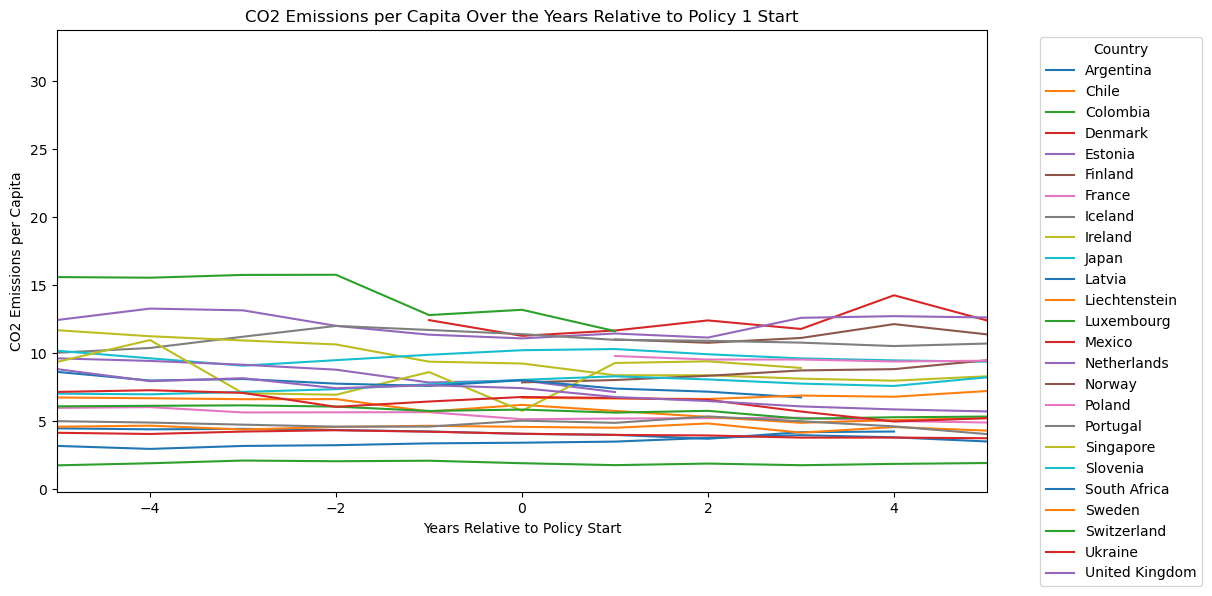

In [12]:
# Visualization of Co2 Emissions over the Years Relative to Start

df_merged = pd.merge(per_capita_filtered_tax, min_years, on='Country', how='inner')

# Calculate the relative years
df_merged['Relative_Year'] = df_merged['Year'] - df_merged['start_year']

# Use seaborn's lineplot to plot CO2 emissions per capita over the years relative to the start of the policy
plt.figure(figsize=(12, 6))
for country, data in df_merged.groupby('Country'):
    sns.lineplot(x='Relative_Year', y='CO2_per_capita', data=data, label=country)

plt.title('CO2 Emissions per Capita Over the Years Relative to Policy 1 Start')
plt.xlabel('Years Relative to Policy Start')
plt.ylabel('CO2 Emissions per Capita')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlim(-5, 5)

plt.show()


# Panel OLS 

In [24]:
# Merge DataFrames
merged_data = pd.merge(per_capita_filtered_tax, min_years, on='Country', how='inner')

# Merge Control Variables Population,
#merged_data = pd.merge(merged_data, population, on=['Country', 'Year'], how='inner')
merged_data = pd.merge(merged_data, gdp, on=['Country', 'Year'], how='inner')
merged_data = pd.merge(merged_data, corp_investment, on=['Country', 'Year'], how='inner')
merged_data = pd.merge(merged_data, industrial_production, on=['Country', 'Year'], how='inner')
merged_data = pd.merge(merged_data, primary_energy_consumption, on=['Country', 'Year'], how='inner')

# Create Column for activation period & carbon tax dummy 
merged_data['activation_period'] = merged_data['Year'] - merged_data['start_year']
merged_data.loc[merged_data['Year'] < merged_data['start_year'], 'activation_period'] = 0

merged_data['CarbonTaxDummy'] = np.where(merged_data['Year'] >= merged_data['start_year'], 1, 0)

merged_data

,Country,Year,CO2_per_capita,start_year,GDP,Investment,Industrial Production,Energy Consumption,activation_period,CarbonTaxDummy
0,Chile,2003,3.474355,2017,4823.257421,67.902386,76.42826,322.48972,0,0
1,Chile,2004,3.697625,2017,6185.303785,64.868977,83.11656,344.29900,0,0
2,Chile,2005,3.779061,2017,7560.543671,68.890986,87.64403,357.32693,0,0
3,Chile,2006,3.921248,2017,9418.274924,66.855790,90.47672,369.68230,0,0
4,Chile,2007,4.272453,2017,10456.832384,65.682426,94.21128,369.29858,0,0
...,...,...,...,...,...,...,...,...,...,...
500,United Kingdom,2018,5.715981,2013,43203.814106,58.261559,103.52820,2243.54170,5,1
501,United Kingdom,2019,5.462123,2013,42662.535374,59.028894,105.31860,2196.60130,6,1
502,United Kingdom,2020,4.865282,2013,40217.009012,57.378200,107.75850,1973.26110,7,1
503,United Kingdom,2021,5.164383,2013,46869.759058,57.340527,103.58080,1999.37770,8,1


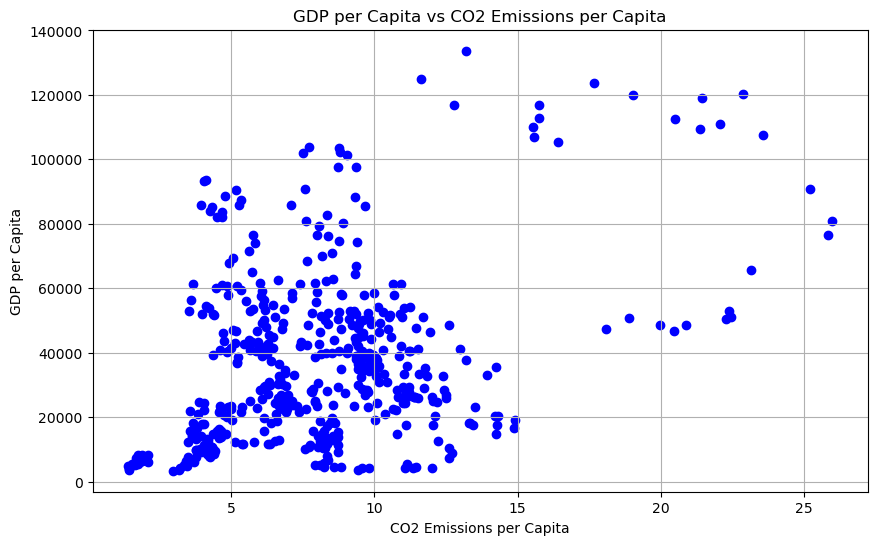

Correlation coefficient between GDP per capita and CO2 emissions per capita: 0.38191039604960486


In [14]:
# Relationship between gdp per capita & co2 emissions per capita

plt.figure(figsize=(10, 6))
plt.scatter(merged_data["CO2_per_capita"], merged_data["GDP"], color='blue')
plt.title('GDP per Capita vs CO2 Emissions per Capita')
plt.xlabel('CO2 Emissions per Capita')
plt.ylabel('GDP per Capita')
plt.grid(True)
plt.show()

correlation = merged_data['GDP'].corr(merged_data['CO2_per_capita'])
print("Correlation coefficient between GDP per capita and CO2 emissions per capita:", correlation)

In [14]:
# Downloading merged_data
merged_data.to_csv('/Users/yeji-park/Downloads/Time_Series_Analysis_CO2/Datasets/merged_data.csv', index=False)

In [25]:
# Set 'Country' and 'Relative_Year' as the index
merged_data.set_index(['Country', 'activation_period'], inplace=True)

model = PanelOLS(merged_data['CO2_per_capita'], sm.add_constant(merged_data[['CarbonTaxDummy', 'GDP', 'Industrial Production', 'Energy Consumption']]), entity_effects=True,drop_absorbed=True, check_rank=False)
results = model.fit()
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:         CO2_per_capita   R-squared:                        0.2811
Estimator:                   PanelOLS   R-squared (Between):             -1.0354
No. Observations:                 505   R-squared (Within):               0.2811
Date:                Sat, Mar 02 2024   R-squared (Overall):             -0.8844
Time:                        13:22:51   Log-likelihood                   -850.38
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      47.128
Entities:                          19   P-value                           0.0000
Avg Obs:                       26.579   Distribution:                   F(4,482)
Min Obs:                       15.000                                           
Max Obs:                       32.000   F-statistic (robust):             47.128
                            

In [21]:
# Set 'Country' and 'Relative_Year' as the index
merged_data.set_index(['Country', 'activation_period'], inplace=True)

model = PanelOLS(merged_data['CO2_per_capita'], sm.add_constant(merged_data[['CarbonTaxDummy', 'Industrial Production', 'Energy Consumption']]), entity_effects=True,drop_absorbed=True, check_rank=False)
results = model.fit()
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:         CO2_per_capita   R-squared:                        0.1418
Estimator:                   PanelOLS   R-squared (Between):             -0.5812
No. Observations:                 505   R-squared (Within):               0.1418
Date:                Sat, Mar 02 2024   R-squared (Overall):             -0.5318
Time:                        13:17:16   Log-likelihood                   -895.13
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      26.597
Entities:                          19   P-value                           0.0000
Avg Obs:                       26.579   Distribution:                   F(3,483)
Min Obs:                       15.000                                           
Max Obs:                       32.000   F-statistic (robust):             26.597
                            

In [26]:
# Get the coefficient of CarbonTaxDummy
carbon_tax_coefficient = results.params['CarbonTaxDummy']

print("Coefficient for CarbonTaxDummy:", carbon_tax_coefficient)


Coefficient for CarbonTaxDummy: -0.6082937037413806


# Modeling 

In [21]:
# Checking Stationarity of my data using Augmented Dickey-Fuller Test
# If p-value is low (0.05), we assume the dataset is stationary

from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val

    print(out.to_string())          # .to_string() removes the line "dtype: float64"

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [22]:
adf_test(per_capita_filtered_notax['CO2_per_capita'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -3.468337
p-value                   0.008839
# lags used               0.000000
# observations          639.000000
critical value (1%)      -3.440625
critical value (5%)      -2.866074
critical value (10%)     -2.569184
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [23]:
# This is when the data is non-stationary
# Checking what kind of ARIMA to use on CO2 per Capita
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')
stepwise_fit2 = auto_arima(per_capita_filtered_notax['CO2_per_capita'],start_p = 0, start_q = 0, max_p = 6, max_q = 3, seasonal = False, trace = True)
stepwise_fit2.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2635.540, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2635.810, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2635.778, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2633.610, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2637.774, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.159 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  640
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1315.805
Date:                Fri, 16 Feb 2024   AIC                           2633.610
Time:                        18:29:34   BIC                           2638.070
Sample:                             0   HQIC                          2635.341
                                - 640                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.5982      0.037     96.890      0.000       3.525       3.671
===================================================================================
Ljung-Box (L1) (Q):                   1.74   Jarque-Bera (JB):             86452.16
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             1.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        59.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [54]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima



auto_arima(per_capita_filtered_notax['CO2_per_capita'], error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  640
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1315.805
Date:                Fri, 16 Feb 2024   AIC                           2633.610
Time:                        19:55:08   BIC                           2638.070
Sample:                             0   HQIC                          2635.341
                                - 640                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         3.5982      0.037     96.890      0.000       3.525       3.671
===================================================================================
Ljung-Box (L1) (Q):                   1.74   Jarque-Bera (JB):             86452.16
Prob(Q):                              0.19   Prob(JB):                         0.00
Heteroskedasticity (H):               1.53   Skew:                             1.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        59.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Only for United States of America 

# Exponential Smoothing

In [51]:
# US from 1991 - 2022
us = per_capita_filtered_notax[per_capita_filtered_notax["Country"] == 'United States']

In [56]:
us.index.freq = 'AS'
train_data = us.iloc[:26]
test_data = us.iloc[26:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['CO2_per_capita'],
                                   trend='mul',
                                    seasonal=None).fit()

/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [57]:
# Forecasting US co2 emissions in next 10 years 
test_predictions = fitted_model.forecast(10)
test_predictions

# Your DataFrame containing the predictions
predictions = pd.Series([15.828018, 15.514533, 15.207256, 14.906066, 14.610840, 14.321462, 14.037816, 13.759787, 13.487264, 13.220139])

# Create a new index with years 2023-2032
years = range(2023, 2033)

# Assign the new index to your predictions DataFrame
predictions_df = pd.DataFrame({'Year': years, 'CO2_per_capita': predictions})

print(predictions_df)

   Year  CO2_per_capita
0  2023       15.828018
1  2024       15.514533
2  2025       15.207256
3  2026       14.906066
4  2027       14.610840
5  2028       14.321462
6  2029       14.037816
7  2030       13.759787
8  2031       13.487264
9  2032       13.220139


/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [58]:
# Merge the two DataFrames
us_forecast_without = pd.concat([us, predictions_df], ignore_index=True)

print(us_forecast_without)

          Country  Year  CO2_per_capita
0   United States  1991       20.126223
1   United States  1992       20.277145
2   United States  1993       20.375822
3   United States  1994       20.452991
4   United States  1995       20.421772
5   United States  1996       20.867321
6   United States  1997       20.881931
7   United States  1998       20.785181
8   United States  1999       20.789043
9   United States  2000       21.282457
10  United States  2001       20.694746
11  United States  2002       20.621824
12  United States  2003       20.645628
13  United States  2004       20.795030
14  United States  2005       20.658026
15  United States  2006       20.192238
16  United States  2007       20.248577
17  United States  2008       19.349745
18  United States  2009       17.765030
19  United States  2010       18.252020
20  United States  2011       17.669733
21  United States  2012       16.876879
22  United States  2013       17.158995
23  United States  2014       17.168007


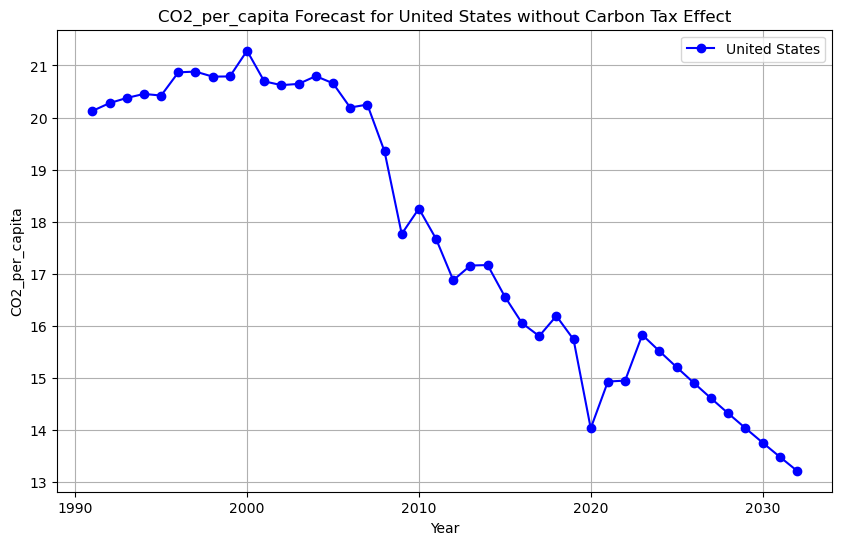

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(us_forecast_without['Year'], us_forecast_without['CO2_per_capita'], marker='o', color='blue', label='United States')
plt.xlabel('Year')
plt.ylabel('CO2_per_capita')
plt.title('CO2_per_capita Forecast for United States without Carbon Tax Effect')
plt.legend()
plt.grid(True)
plt.show()

In [60]:
# Applying Carbon Tax Effect
starting_year = 2023

# Apply the carbon tax effect from the starting year
us_forecast_without.loc[us_forecast_without['Year'] >= starting_year, 'CO2_per_capita'] += carbon_tax_coefficient

# Print the updated DataFrame
print(us_forecast_without)


# Concatenate the two DataFrames
us_forecast_concatenated = pd.concat([us, us_forecast_without], ignore_index=True)

          Country  Year  CO2_per_capita
0   United States  1991       20.126223
1   United States  1992       20.277145
2   United States  1993       20.375822
3   United States  1994       20.452991
4   United States  1995       20.421772
5   United States  1996       20.867321
6   United States  1997       20.881931
7   United States  1998       20.785181
8   United States  1999       20.789043
9   United States  2000       21.282457
10  United States  2001       20.694746
11  United States  2002       20.621824
12  United States  2003       20.645628
13  United States  2004       20.795030
14  United States  2005       20.658026
15  United States  2006       20.192238
16  United States  2007       20.248577
17  United States  2008       19.349745
18  United States  2009       17.765030
19  United States  2010       18.252020
20  United States  2011       17.669733
21  United States  2012       16.876879
22  United States  2013       17.158995
23  United States  2014       17.168007


In [63]:
# Activation Period 
# Create a new variable for activation period
us_forecast_concatenated['activation_period'] = us_forecast_concatenated['Year'] - 2023
us_forecast_concatenated['activation_period'] = us_forecast_concatenated['activation_period'].clip(lower=0)  # Ensure activation period is non-negative

# Applying Carbon Tax Effect
for index, row in us_forecast_concatenated.iterrows():
    years_since_activation = row['activation_period']
    carbon_tax_effect = carbon_tax_coefficient * (years_since_activation + 1)  # Add 1 to account for the first year
    us_forecast_concatenated.at[index, 'CO2_per_capita'] += carbon_tax_effect

print(us_forecast_concatenated)


          Country  Year  CO2_per_capita  activation_period
0   United States  1991       20.126223                  0
1   United States  1992       20.277145                  0
2   United States  1993       20.375822                  0
3   United States  1994       20.452991                  0
4   United States  1995       20.421772                  0
..            ...   ...             ...                ...
69            NaN  2028       13.713168                  5
70            NaN  2029       13.429522                  6
71            NaN  2030       13.151493                  7
72            NaN  2031       12.878970                  8
73            NaN  2032       12.611845                  9

[74 rows x 4 columns]


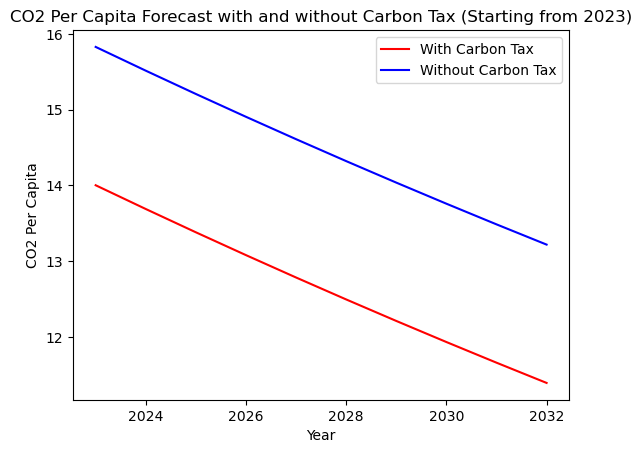

In [160]:
us_forecast = us_forecast[us_forecast['Year'] >= 2023]
us_forecast_without = us_forecast_without[us_forecast_without['Year'] >= 2023]

# Plot the DataFrame with carbon tax effect (us_forecast)
plt.plot(us_forecast['Year'], us_forecast['CO2_per_capita'], color='red', label='With Carbon Tax')

# Plot the DataFrame without carbon tax effect (us_forecast_without)
plt.plot(us_forecast_without['Year'], us_forecast_without['CO2_per_capita'], color='blue', label='Without Carbon Tax')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Per Capita')
plt.title('CO2 Per Capita Forecast with and without Carbon Tax (Starting from 2023)')
plt.legend()
plt.show()

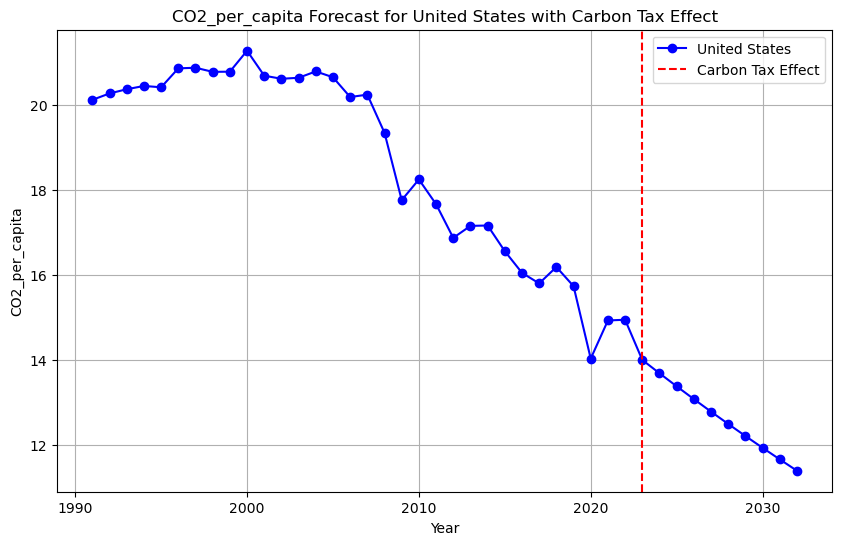

In [163]:
plt.figure(figsize=(10, 6))
plt.plot(us_forecast_concatenated['Year'], us_forecast_concatenated['CO2_per_capita'], marker='o', color='blue', label='United States')
plt.axvline(x=2023, color='red', linestyle='--', label='Carbon Tax Effect')  # Add vertical line at Year = 2023
plt.xlabel('Year')
plt.ylabel('CO2_per_capita')
plt.title('CO2_per_capita Forecast for United States with Carbon Tax Effect')
plt.legend()
plt.grid(True)
plt.show()

# SARIMAX 

In [45]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

per_capita_filtered_notax.reset_index(inplace=True)

forecast_data = pd.DataFrame()

for country in per_capita_filtered_notax['Country'].unique():
    country_data = per_capita_filtered_notax[per_capita_filtered_notax['Country'] == country]
    model = sm.tsa.SARIMAX(country_data['CO2_per_capita'],
                            exog=np.full_like(country_data['CO2_per_capita'], carbon_tax_coefficient),
                            order=(0, 1, 0),
                            seasonal_order=None,
                            enforce_stationarity=False,
                            enforce_invertibility=False)
    fitted_model = model.fit()
    forecast = fitted_model.forecast(steps=10, exog=np.full((10, 1), carbon_tax_coefficient))
    forecast_df = pd.DataFrame({
        'Country': country,
        'Year': range(country_data['Year'].max() + 1, country_data['Year'].max() + 11),
        'Forecast_CO2_per_capita': forecast
    })
    forecast_data = pd.concat([forecast_data, forecast_df], ignore_index=True)

print(forecast_data)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45116D+00    |proj g|=  4.91308D-01
  ys=-9.034E-02  -gs= 7.187E-01 BFGS update SKIPPED

At iterate    5    f=  3.08406D-01    |proj g|=  8.76461D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     16      2     1     0   1.212D-06   3.084D-01
  F =  0.30840372108643388     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N = 

 This problem is unconstrained.
/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     12      1     0     0   3.489D-06   8.356D-01
  F =  0.83559227000677994     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.85715D-01    |proj g|=  8.07132D-01
  ys=-2.401E-03  -gs= 7.215E-01 BFGS update SKIPPED

At iterate    5    f= -1.55481D-01    |proj g|=  1.29010D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of fu

/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [48]:
# SARIMAX
import statsmodels.api as sm

per_capita_filtered_notax.reset_index(inplace=True)

forecast_data = pd.DataFrame()

# Filter data for only the United States
us_data = per_capita_filtered_notax[per_capita_filtered_notax['Country'] == 'United States']

model = sm.tsa.SARIMAX(us_data['CO2_per_capita'],
                        exog=np.full_like(us_data['CO2_per_capita'], carbon_tax_coefficient),
                        order=(0, 1, 0),
                        seasonal_order=None,
                        enforce_stationarity=False,
                        enforce_invertibility=False)
fitted_model = model.fit()
forecast = fitted_model.forecast(steps=10, exog=np.full((10, 1), carbon_tax_coefficient))
forecast_df = pd.DataFrame({
    'Country': 'United States',
    'Year': range(us_data['Year'].max() + 1, us_data['Year'].max() + 11),
    'Forecast_CO2_per_capita': forecast
})
forecast_data = pd.concat([forecast_data, forecast_df], ignore_index=True)

print(forecast_data)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.97777D+00    |proj g|=  2.80154D-01

At iterate    5    f=  8.35592D-01    |proj g|=  3.48888D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5     12      1     0     0   3.489D-06   8.356D-01
  F =  0.83559227000677994     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
         Country  Year  Forecast_CO2_per_capita
0  United States  2023                14.949616
1  United States  2024              

/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 This problem is unconstrained.
/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/yeji-park/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [181]:
# XGBoost 
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'us' contains the data for the United States from 1991 to 2022

# Feature engineering: Splitting into features (X) and target variable (y)
X = us[['Year']]  # Assuming 'Year' is a feature
y = us['CO2_per_capita']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the XGBoost model
model = XGBRegressor()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Calculating Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.7426145405654607


In [183]:
# Forecasting next 10 years 

# Generate future years for prediction
future_years = np.arange(2023, 2033).reshape(-1, 1)

# Predict CO2 emissions for the next 10 years
future_predictions = model.predict(future_years)

# Display the predicted CO2 emissions
print("Predicted CO2 emissions for the next 10 years:")
for year, prediction in zip(range(2023, 2033), future_predictions):
    print(f"Year {year}: {prediction}")


Predicted CO2 emissions for the next 10 years:
Year 2023: 14.950783729553223
Year 2024: 14.950783729553223
Year 2025: 14.950783729553223
Year 2026: 14.950783729553223
Year 2027: 14.950783729553223
Year 2028: 14.950783729553223
Year 2029: 14.950783729553223
Year 2030: 14.950783729553223
Year 2031: 14.950783729553223
Year 2032: 14.950783729553223
